In [1]:
import math
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

### Questão A

In [2]:
# define valores para o  intervalo o alpha e o beta (de acordo com o enunciado)
intervalo = np.arange(-5,5,0.01)
alpha = 0.2
beta = 2

In [3]:
# criando os vetores de y a partir do intervalo
valores_de_y  = (np.exp(intervalo * alpha ) - np.exp(intervalo*(alpha-1))) - beta * np.ones(len(intervalo)) 

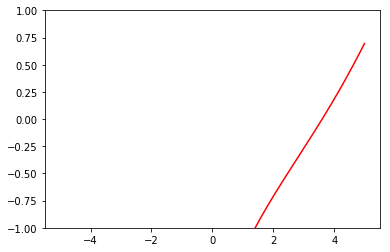

In [4]:
# plota um grafico da função de Butler-Volmer com limitação no eixo das ordenadas(entre -1 e 1).
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(intervalo,valores_de_y,color='red')
ax.set_ylim([-1,1])
plt.show()

### RESPOSTA:
    Da figura acima  podemos afirmar que contem um zero entre o intervalo [2,5]

### Questão B

In [5]:
# criação de funções que calculam o valor da equação de Butler-Volmer e sua derivada em um determinado ponto

def eq_butler_volmer(valor_de_x:float, alpha:float = 0.2 , beta:int = 2) -> float:
    '''
    Dado um valor_de_x qualquer, calcula-se  a imagem da equação de Butler/Volmer nesse ponto.
    '''
    valor_de_y  = math.exp(valor_de_x * alpha) - math.exp(valor_de_x*(alpha-1)) - beta
    
    return valor_de_y


def derivada_eq_butler_volmer(valor_de_x:int, alpha:float = 0.2) -> float:
    '''
    Dado um valor_de_x qualquer, calcula-se a imagem da derivada equação de Butler/Volmer nesse ponto.
    '''
    valor_de_y  = (alpha)*math.exp(valor_de_x * alpha ) - (alpha-1) * math.exp(valor_de_x*(alpha-1))
    
    return valor_de_y

In [6]:
##### Método da bissecção

In [7]:
# define a função que calculara o valor de y dado um x
def metodo_da_bissecção(intervalo_inicial: list, criterio_de_parada: float= 0.01, max_iter: int=1000) -> (list,int):
    '''
    Dado um intervalo_inicial, calcula-se o zero da  equação de Butler-Volmer
    de acordo com o metodo da bissecção
    
    obs: os valores do criterios de parada 
    e o numero maximo de iterações é pre-definidos como 0.01 e 1000,
    respectivamente.
    
    '''
    # pre-define as configurações iniciais das variaveis a serem utilizadas 
    intervalo = intervalo_inicial
    num_iter = 0
    a,b = intervalo[0],intervalo[1]
    
    # loop principal
    while  (num_iter < max_iter): # interrompe o loop caso a variavel num_iter passe o maximo de iterações. 
        # verifica se o criterio de para foi satisfeito, se nao foi, faz masi uma iteração.
        if ((b - a) > criterio_de_parada) :
            num_iter += 1
            candidata = (a+b) / 2
            if np.sign(eq_butler_volmer(a) * eq_butler_volmer(candidata)) == -1:
                a,b = a,candidata
            elif np.sign(eq_butler_volmer(a) * eq_butler_volmer(candidata)) == 1:
                a,b = candidata,b
        # se o criterio de parada foi satisfeito, ele interrompe o loop
        else:
            max_iter = num_iter
    intervalo = list((a,b))
    
    return np.mean(intervalo),num_iter

##### Método de Newton

In [8]:
def metodo_de_newton(
                        valor_inicial: float,
                        epsilon_1: float=0.01,
                        epsilon_2: float=0.01,
                        max_iter:int= 1000
    ) -> int :
    '''
    Dado um valor_inicial, calcula-se o zero da  equação de Butler-Volmer
    de acordo com o metodo de newton
    
    obs: os valores de epsilon 1 e 2  
    e o numero maximo de iterações são pre-definidos como 0.01, 0,01 e 1000,
    respectivamente.
    
    '''
    # verifica se o valor inicial ja é a candidata a solução
    if abs(eq_butler_volmer(valor_inicial)) < epsilon_1:
        return (valor_inicial,0)
    # configura as variaves do loop com suas condições iniciais 
    candidata = valor_inicial
    num_iter=0
    valor_anterior = 0
    
    #loop principal
    while   (num_iter < max_iter): # se o numero de iterações for maior que o numero maximo, ele interrompe o loop principal
        #  se as condições iniciais foram satisfeitas, se nao foram, faz mais uma iteração
        if((candidata - valor_anterior) > epsilon_2) or (eq_butler_volmer(candidata) > epsilon_1):
            valor_anterior = candidata
            candidata = valor_anterior - (eq_butler_volmer(valor_anterior) / derivada_eq_butler_volmer(valor_anterior))
            num_iter += 1
        # se as condições iniciais foram satisfeitas, interrompe o loop
        else:
            max_iter = num_iter
            
    return candidata,num_iter           

In [9]:
# teste da metodo_da_bissecção
metodo_da_bissecção([2,5])

(3.6025390625, 9)

In [10]:
# teste para o metodo_de_newton
metodo_de_newton(2)

(3.6037324507520503, 3)

### Questão C

In [11]:
# funções geradoras de tabela
def gera_tabela_bissec(rangea: list, rangeb: list, passo: float=1) -> pd.DataFrame:
    '''
    Dado duas listas, rangea e rangeb,
    as quais representam os valores dos pontos iniciais do metodo de bissecção,
    se produz tabelas contendo o resultado da concatenação dos possiveis valores de rangea e rangeb
    obs:o passo das lista é pre-definido como sendo 1     
    '''
    # pre-define os valores iniciais das variaveis
    range_a = np.arange(rangea[0] , rangea[1], -passo)
    range_b = np.arange(rangeb[0],rangeb[1], passo)
    dataframe_final = pd.DataFrame()
    
    #loop inicial
    for a in range_a:
        for b in range_b:
            media, iterações = 0,0
            media, iterações = metodo_da_bissecção([a,b])
            row = pd.DataFrame([a,b,media,iterações], index = ['a','b','media','iterações'])
            dataframe_final = dataframe_final.append(row.T,ignore_index = True)

    return dataframe_final
def gera_tabela_newton(rangea:list, passo:int = 1) -> pd.DataFrame:
    '''
    Dado um rangea inicial,
    ao qual contem os possiveis valores iniciais do metodo de newton,
    se produz uma tabela contendo o valor inicial , o resultado e o numero de iterações
    
    obs: o valor do passo da lista é pre-definido como sendo 1
    
    '''
    # pre-define os valores iniciais das variaveis alem de criar uma lista vazia
    range_a = np.arange(rangea[0],rangea[1],passo)
    dataframe_final = pd.DataFrame()
    
    # loop inicial
    for x in range_a:
        media, iteração = metodo_de_newton(x)
        row = pd.DataFrame([x,media,iteração],index=['x','media','iteração'])
        dataframe_final = dataframe_final.append(row.T,ignore_index = True)

    return dataframe_final     

In [12]:
gera_tabela_bissec([-1,-10],[1,10])

,a,b,media,iterações
0,-1.0,1.0,0.996094,8.0
1,-1.0,2.0,1.997070,9.0
2,-1.0,3.0,2.996094,9.0
3,-1.0,4.0,3.604492,9.0
4,-1.0,5.0,3.602539,10.0
5,-1.0,6.0,3.604004,10.0
6,-1.0,7.0,3.605469,10.0
7,-1.0,8.0,3.601074,10.0
8,-1.0,9.0,3.604492,10.0
9,-2.0,1.0,0.997070,9.0


In [13]:
gera_tabela_newton([0,10])

,x,media,iteração
0,0.0,0.000000,0.0
1,1.0,3.603738,3.0
2,2.0,3.603732,3.0
3,3.0,3.603739,2.0
4,4.0,3.613205,1.0
5,5.0,3.604843,2.0
6,6.0,3.615578,2.0
7,7.0,3.603875,3.0
8,8.0,3.604932,3.0
9,9.0,3.609756,3.0
